This notebook contains code to reproduce the multi-fidelity neural network function approximation results from Meng and Karniadakis 2019. 

In [7]:
''' Magics '''
%matplotlib notebook

''' Relevant imports '''
import torch
import math
from math import cos, sin, atan
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from utils.visualizer import visualize_network, generate_plots
from utils.trainer import setup_training, train_MFNN
from mfnn import MFNN
from fnn import FNN

<IPython.core.display.Javascript object>


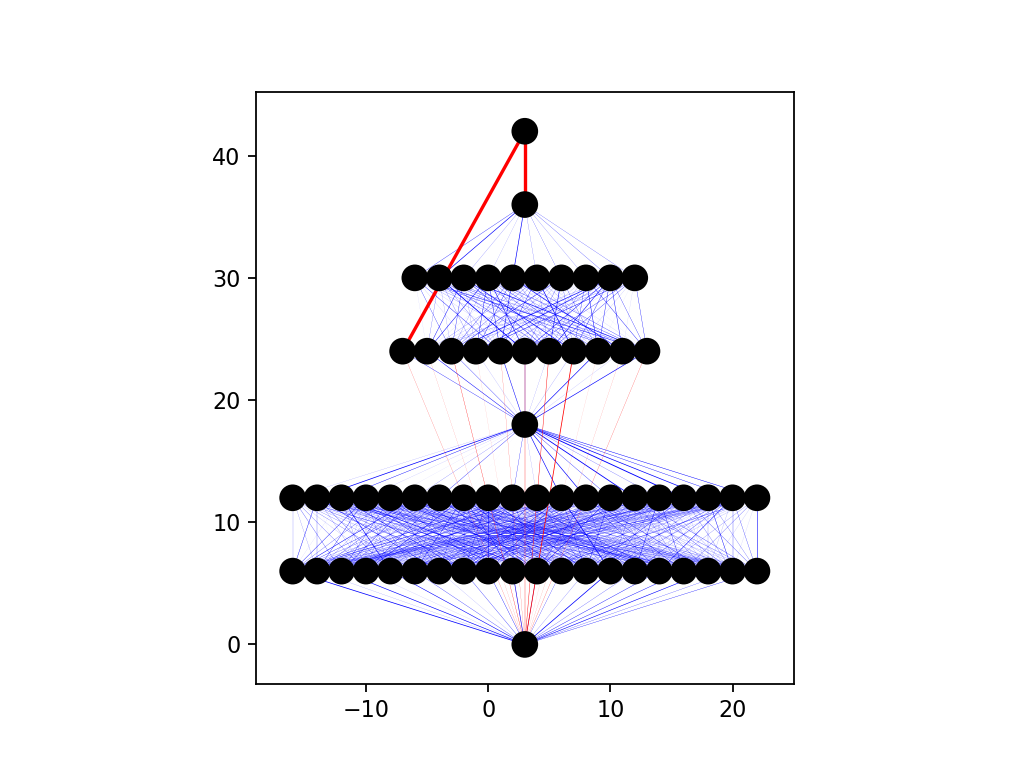

In [5]:
visualize_network(nn_mfl)

In [ ]:
''' EXAMPLE 1: Continuous function example. '''

def low_fi(x, A=.5, B=10, C=-5): 
    return A*(6*x-2)**2 * torch.sin(12*x-4) + B*(x-0.5) + C

def high_fi(x, A=.5, B=10, C=-5): 
    return (6*x-2)**2 * torch.sin(12*x-4)

def grad_low_fi(x, A=.5, B=10, C=-5): 
    return 6*torch.sin(12*x-4) + (72*x - 24)*torch.cos(12*x-4) + 10

# Setup training data.
(nn_mfl, train_data, num_low, num_high) = setup_training(
    low_fi, 
    high_fi, 
    [1, 20, 20, 1], 
    [2, 1], 
    [2, 10, 10, 1], 
    [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
    [0, 0.4, 0.6, 1]
)

# Define training parameters and run training loop.
num_epochs = 8000
lr = .001
l2_lambda_h2 = .1
losses = train_MFNN(
    nn_mfl, 
    num_epochs, 
    lr, 
    l2_lambda_h2, 
    train_data, 
    num_low, 
    num_high, 
    grad_low_fi=grad_low_fi
)

 89%|████████▊ | 7094/8000 [09:43<01:07, 13.41it/s]

<IPython.core.display.Javascript object>


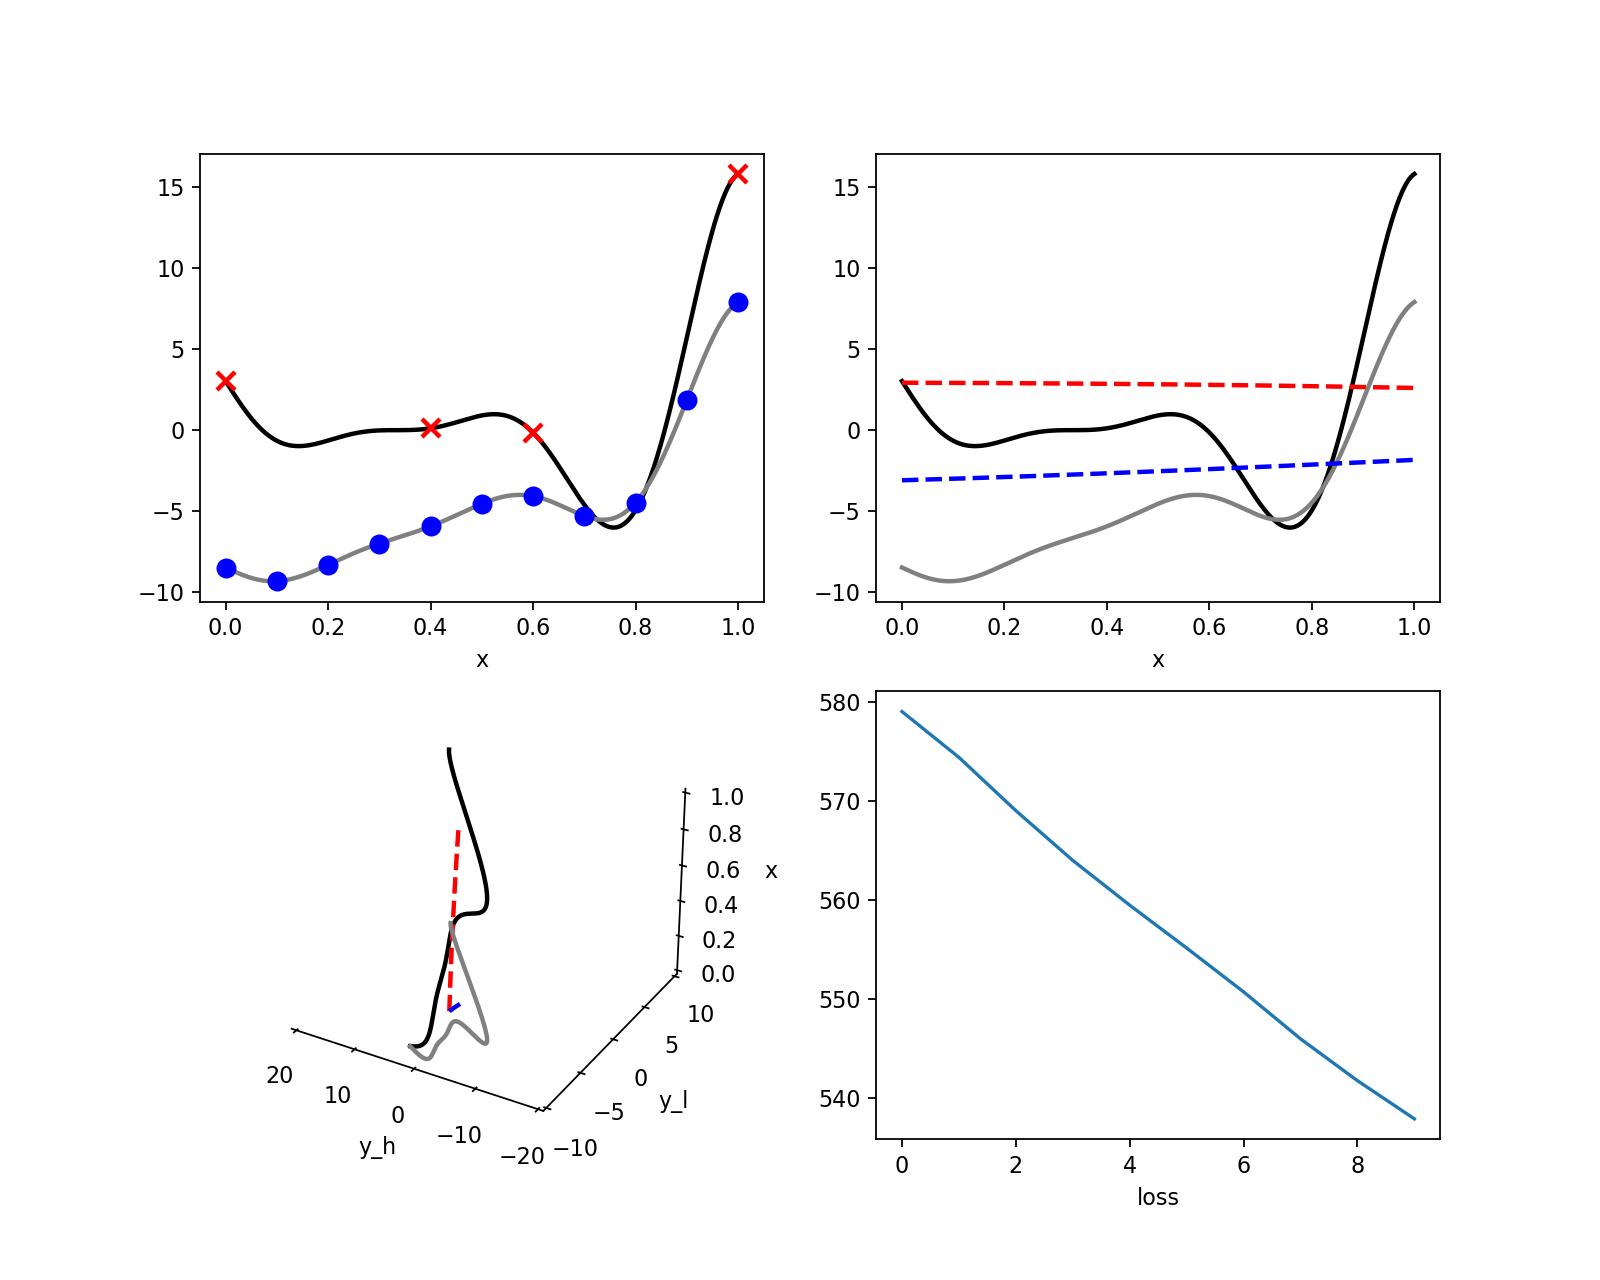

In [8]:
generate_plots(nn_mfl, train_data, num_low, high_fi, low_fi, losses, mesh_size=1000)

In [263]:
''' EXAMLE 2: Discontinuous function examle. '''
def low_fi(x): 
    small = 0.5*((6*x-2)**2)*torch.sin(12*x-4) + 10*(x-0.5)-5
    big = 3 + 0.5*((6*x-2)**2)*torch.sin(12*x-4) + 10*(x-0.5)-5
    return torch.where((x >= 0) & (x <= .5), small, big)   

def high_fi(x): 
    small = 2*low_fi(x) - 20*x + 20
    big = 4 + 2*low_fi(x) - 20*x + 20
    return torch.where((x >= 0) & (x <= .5), small, big)

def grad_low_fi(x): 
    small = 216*((1/3 - x)**2)*torch.cos(12*x-4) - (12-36*x)*torch.sin(12*x-4) + 10
    big = 216*((1/3 - x)**2)*torch.cos(12*x-4) - (12-36*x)*torch.sin(12*x-4) + 10
    return torch.where((x >= 0) & (x <= .5), small, big)

# Setu training data.
(nn_mfl, train_data, num_low, num_high) = setu_training(
    low_fi, 
    high_fi, 
    [1, 20, 20, 20, 20, 1], 
    [2, 1], 
    [2, 10, 10, 1], 
    n.linsace(0, .4, 8).tolist()+n.linsace(.4, .6, 22).tolist()+n.linsace(.6, 1, 8).tolist(), 
    [0.2, 0.4, 0.6, 0.75, 0.9]
)

# Define training arameters and run training loo.
num_eochs = 2000
lr = .001
l2_lambda_h2 = .02
l2_lambda_l = .0018
losses = train_MFNN(
    nn_mfl, 
    num_eochs, 
    lr, 
    l2_lambda_h2,
    train_data,
    num_low, 
    num_high,
    l2_lambda_l=l2_lambda_l,
    grad_low_fi=grad_low_fi,
    =2,
)

100%|██████████| 2000/2000 [12:18<00:00,  2.71it/s]


<IPython.core.display.Javascript object>


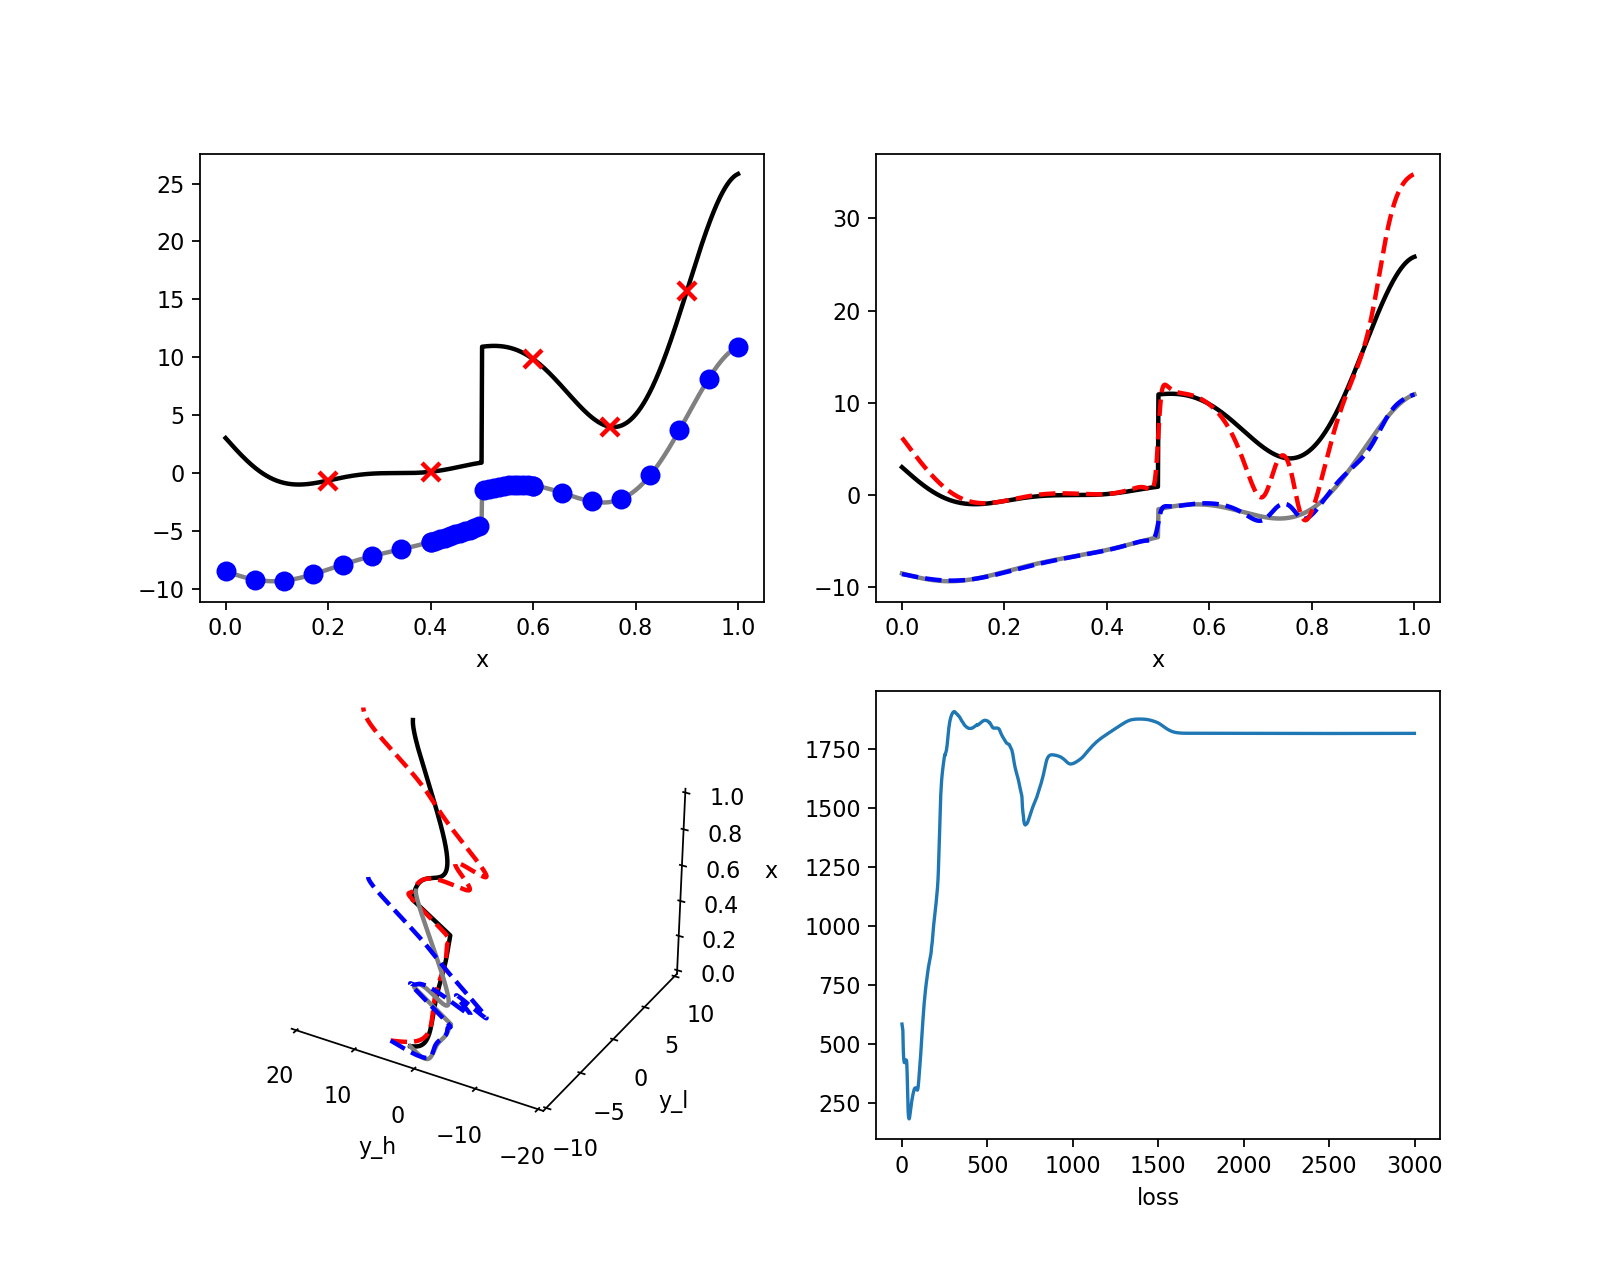

In [239]:
generate_plots(nn_mfl, train_data, num_low, high_fi, low_fi, losses, mesh_size=1000)

In [216]:
''' EXAMPLE 3: Continuous function with nonlinear correlation example. '''
def low_fi(x): 
    return torch.sin(8*math.pi*x)

def high_fi(x): 
    return (x-math.sqrt(2))*low_fi(x)*low_fi(x)

def grad_low_fi(x): 
    return torch.cos(8*math.pi*x)*8*math.pi

# Setup training data.
(nn_mfl, train_data, num_low, num_high) = setup_training(
    low_fi, 
    high_fi, 
    [1, 20, 20, 20, 20, 1], 
    [2, 1], 
    [2, 10, 10, 1], 
    np.linspace(0, 1, 51).tolist(), 
    np.arange(0, 1, step=.075).tolist(),
)

# Define training parameters and run training loop.
num_epochs = 1000
lr = .001
l2_lambda_h2 = .00029
l2_lambda_l = 0.0001
losses = train_MFNN(
    nn_mfl, 
    num_epochs, 
    lr, 
    l2_lambda_h2,
    train_data,
    num_low, 
    num_high,
    l2_lambda_l=l2_lambda_l,
    grad_low_fi=grad_low_fi,
)

100%|██████████| 1000/1000 [06:46<00:00,  2.46it/s]


<IPython.core.display.Javascript object>


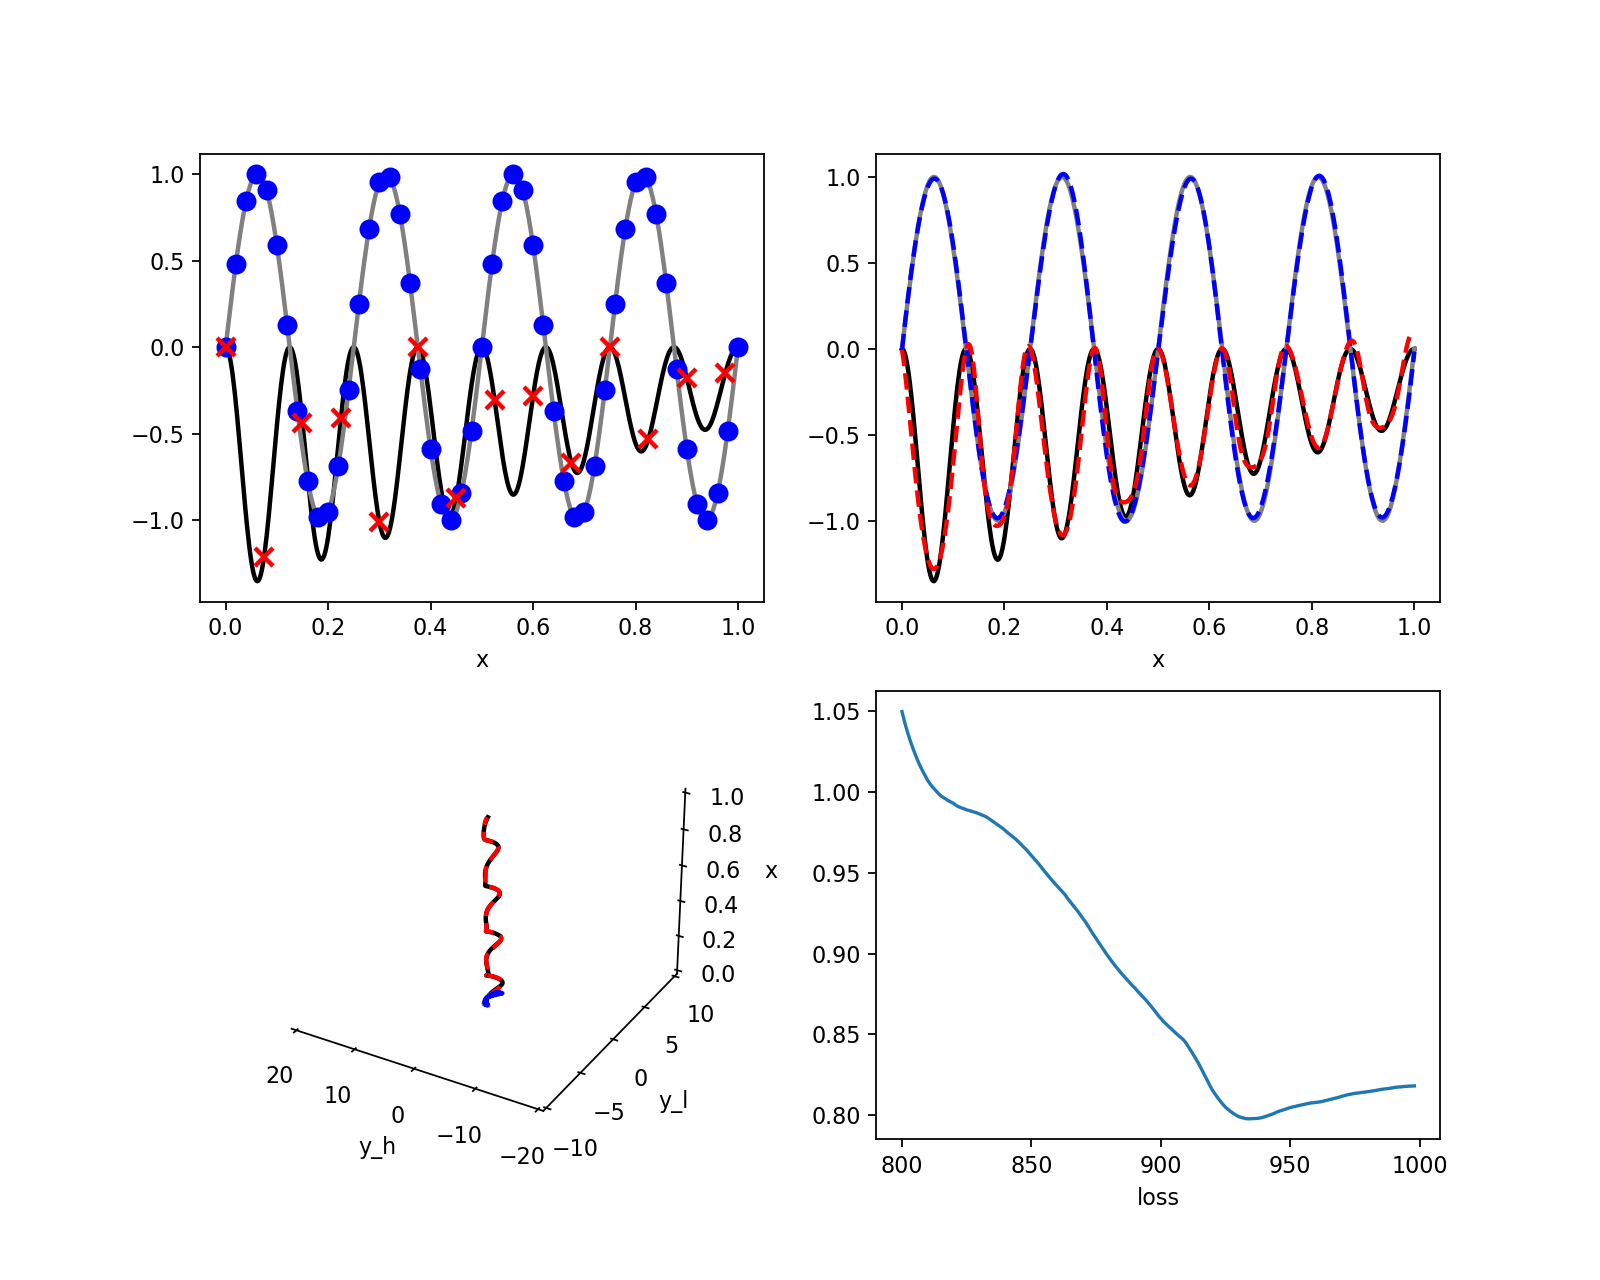

In [217]:
generate_plots(nn_mfl, train_data, num_low, high_fi, low_fi, losses, mesh_size=500, range_loss_plot=800)

In [271]:
''' EXAMPLE 4: Continuous function with phase shift and highly nonlinear correlation example. '''
def low_fi(x): 
    return torch.sin(8*math.pi*x)

def high_fi(x): 
    return x**2+(torch.sin(8*math.pi*x + math.pi/10))**2

def grad_low_fi(x): 
    return torch.sin(8*math.pi*x)

# Setup training data.
(nn_mfl, train_data, num_low, num_high) = setup_training(
    low_fi, 
    high_fi, 
    [1, 20, 20, 20, 20, 1], 
    [2, 1], 
    [3, 10, 10, 1], 
    np.linspace(0, 1, 51).tolist(), 
    np.linspace(0, 1, 16).tolist(),
    use_yl2=True, 
    tau=.0449,
)

# Define training parameters and run training loop.
num_epochs = 1000
lr = .001
l2_lambda_h2 = .004
l2_lambda_l = 0.0001
losses = train_MFNN(
    nn_mfl, 
    num_epochs, 
    lr, 
    l2_lambda_h2,
    train_data,
    num_low, 
    num_high,
    l2_lambda_l=l2_lambda_l,
    grad_low_fi=grad_low_fi,
)

100%|██████████| 1000/1000 [05:28<00:00,  3.05it/s]


<IPython.core.display.Javascript object>


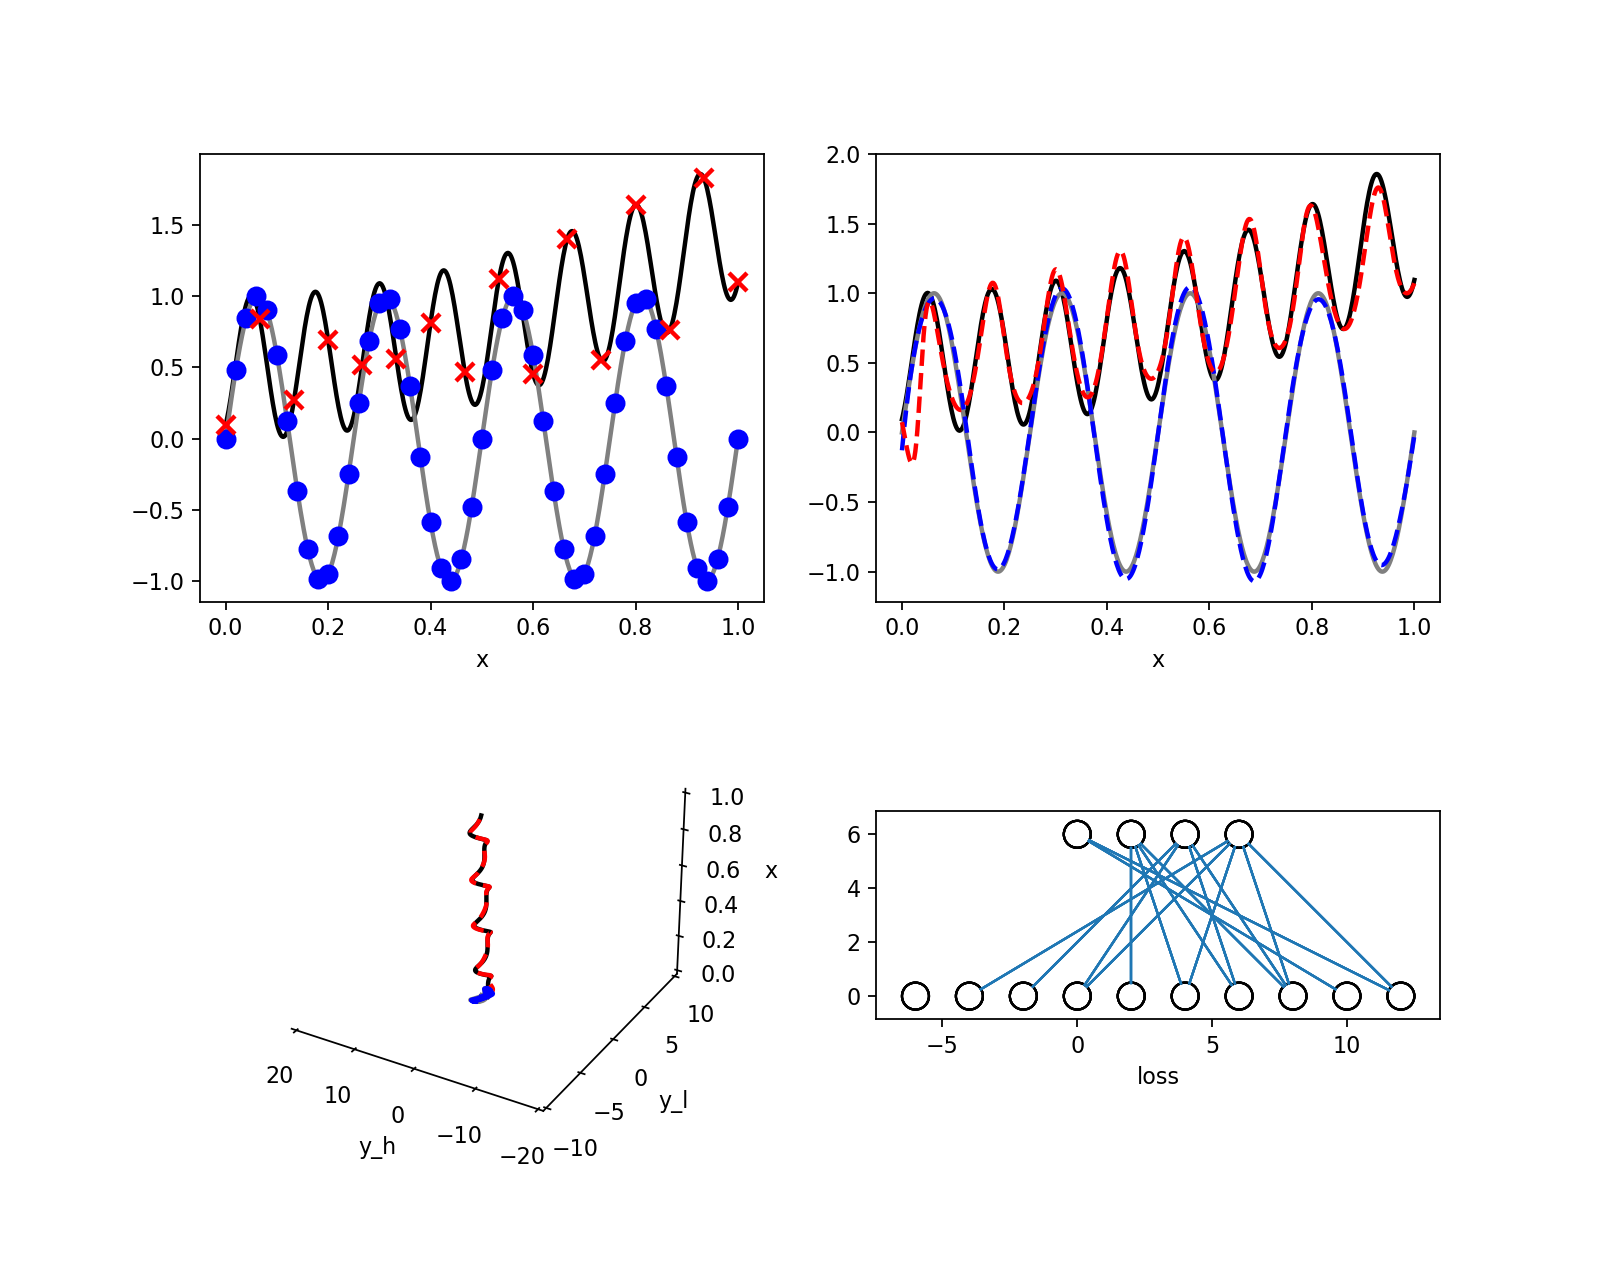

In [270]:
generate_plots(nn_mfl, train_data, num_low, high_fi, low_fi, losses, mesh_size=500, range_loss_plot=1000)

<IPython.core.display.Javascript object>


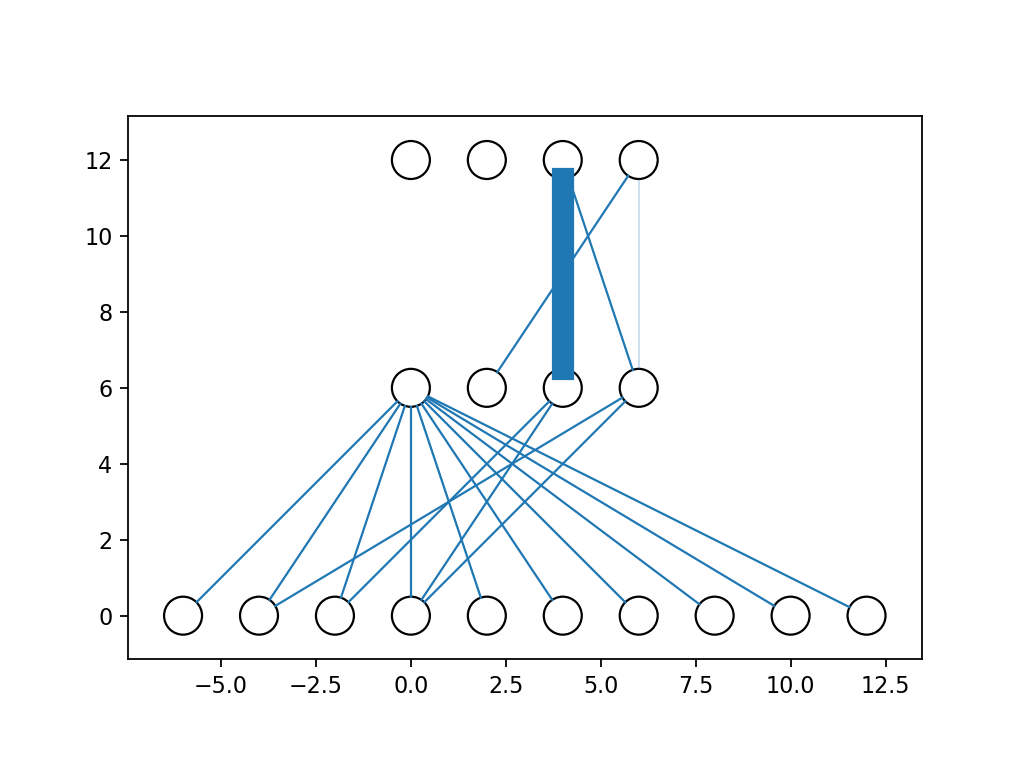

In [347]:
%matplotlib notebook

class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, weights):
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)
        self.weights = weights

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return horizontal_distance_between_neurons * (number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2, linewidth):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = neuron_radius * sin(angle)
        y_adjustment = neuron_radius * cos(angle)
        line_x_data = (neuron1.x - x_adjustment, neuron2.x + x_adjustment)
        line_y_data = (neuron1.y - y_adjustment, neuron2.y + y_adjustment)
        line = plt.Line2D(line_x_data, line_y_data, linewidth=linewidth)
        plt.gca().add_line(line)

    def draw(self):
        for this_layer_neuron_index in range(len(self.neurons)):
            neuron = self.neurons[this_layer_neuron_index]
            neuron.draw()
            if self.previous_layer:
                for previous_layer_neuron_index in range(len(self.previous_layer.neurons)):
                    previous_layer_neuron = self.previous_layer.neurons[previous_layer_neuron_index]
                    weight = self.previous_layer.weights[this_layer_neuron_index, previous_layer_neuron_index]
                    self.__line_between_two_neurons(neuron, previous_layer_neuron, weight)


class NeuralNetwork():
    def __init__(self):
        self.layers = []

    def add_layer(self, number_of_neurons, weights=None):
        layer = Layer(self, number_of_neurons, weights)
        self.layers.append(layer)

    def draw(self):
        for layer in self.layers:
            layer.draw()
        plt.axis('scaled')
        plt.show()



vertical_distance_between_layers = 6
horizontal_distance_between_neurons = 2
neuron_radius = 0.5
number_of_neurons_in_widest_layer = 4
network = NeuralNetwork()
# weights to convert from 10 outputs to 4 (decimal digits to their binary representation)
weights1 = np.array([\
                     [1,1,1,1, 1,1,1,1, 1, 1],\
                     [0,0,0,0, 0,0,0,0, 0, 0],\
                     [0,0,1,1, 0,0,0,0, 0, 0],\
                     [0,1,0,1, 0,0,0,0, 0, 0]
                    ]
                   )
weights2 = np.array([\
                     [0,0,0,0],\
                     [0,0,0,0],\
                     [0,0,10,1],\
                     [0,1,0,.2]
                    ]
                   )
network.add_layer(10, weights1)
network.add_layer(4, weights2)
network.add_layer(4)
network.draw()

In [319]:
for name, param in nn_mfl.named_parameters(): 
    if "weight" in name: 
        print(name)
        print(param.shape)

nn_l.linear_layers.0.weight
torch.Size([20, 1])
nn_l.linear_layers.1.weight
torch.Size([20, 20])
nn_l.linear_layers.2.weight
torch.Size([20, 20])
nn_l.linear_layers.3.weight
torch.Size([20, 20])
nn_l.linear_layers.4.weight
torch.Size([1, 20])
nn_h1.linear_layers.0.weight
torch.Size([1, 2])
nn_h2.linear_layers.0.weight
torch.Size([10, 3])
nn_h2.linear_layers.1.weight
torch.Size([10, 10])
nn_h2.linear_layers.2.weight
torch.Size([1, 10])


In [668]:
network = NeuralNetwork()
nn_mfl.dim_in = 1
nn_mfl.dim_out = 1
nn_h2_weight0 = None
nn_h1_weight0 = None
is_first_layer = True
# Add all layers in nn_l
for name, param in nn_mfl.named_parameters(): 
    # nn_l should show up first. 
    if "weight" in name and "nn_l" in name:
        network.add_layer(param.shape[1], param.data.numpy(), is_first_layer=is_first_layer)
        is_first_layer=False
    # Construct the first layers of nn_h1 and nn_h2.
    elif "0.weight" in name: 
        if "weight" in name and "nn_h1" in name: 
            # nn_h1 should show up first. 
            nn_h1_weight0 = param.data.numpy()
            # Copy layers which map from input layer 
            nn_h1_first_layer_weights = nn_h1_weight0[:, 0:nn_mfl.dim_in]
            left = nn_h1_weight0.shape[1] - nn_mfl.dim_in
            # Zero out input layer weights so they don't draw to the previous layer
            nn_h1_weight0[:, 0:left+1] = nn_h1_weight0[:, nn_mfl.dim_in:]
            nn_h1_weight0[:, left:] = 0
        elif "weight" in name and "nn_h2" in name: 
            # nn_h2 should show up second. 
            nn_h2_weight0 = param.data.numpy()
            nn_h2_first_layer_weights = nn_h2_weight0[:, 0:nn_mfl.dim_in]
            nn_h2_weight0[:, 0:nn_mfl.dim_in] = 0 
            # Add output node of nn_l.
            network.add_layer(nn_mfl.dim_out, np.ones((2, nn_mfl.dim_out)))
            first_layer_weights = np.concatenate(
                (nn_h1_first_layer_weights, nn_h2_first_layer_weights), 
                axis=0
            )
            weights0 = np.concatenate((nn_h1_weight0, nn_h2_weight0), axis=0)
            network.add_layer(2, weights0)
    # Only nn_h2 should have the next hidden layers. 
    elif "1.weight" in name: 
        nn_h2_weight1 = param.data.numpy()
        # Add one node to this layer for the output of nn_h1.
        network.add_layer(
            param.shape[1]+1, 
            np.concatenate((np.zeros((param.shape[0], 1)), param.data.numpy()), axis=1), 
            first_layer_weights=first_layer_weights, 
            is_first_hf_layer=True,
        )
    elif "weight" in name: 
        network.add_layer(param.shape[1], param.data.numpy())
# Add output layer
network.add_layer(nn_mfl.dim_out, first_hf_layer_weights=first_hf_layer_weights,)

<IPython.core.display.Javascript object>


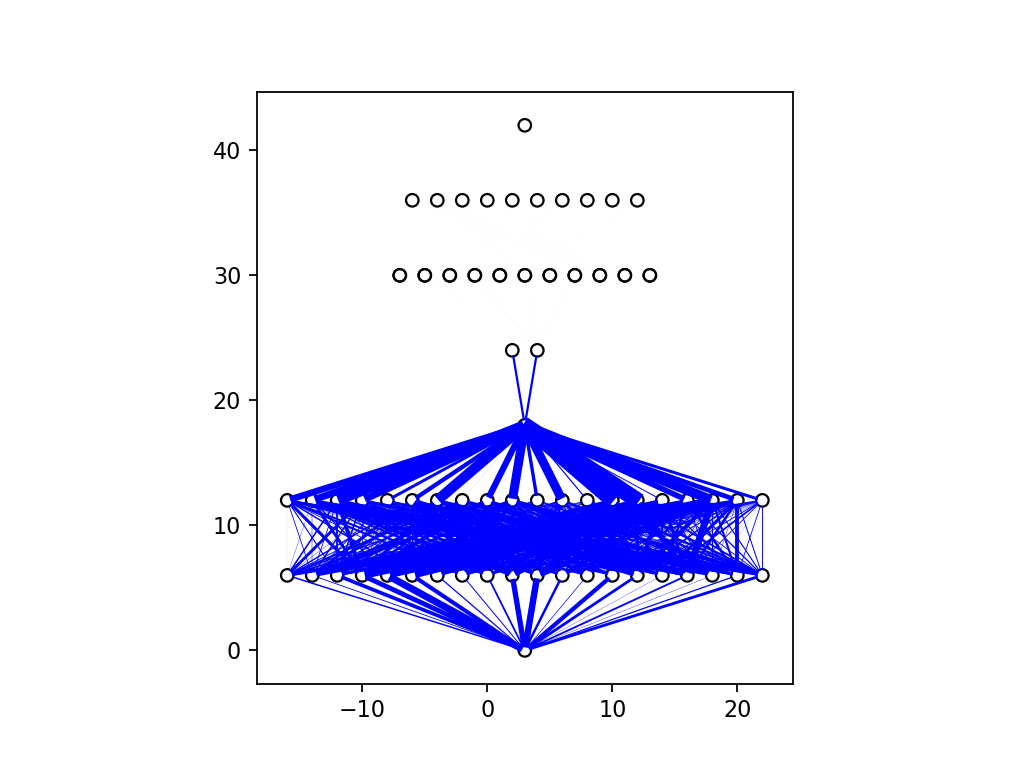

In [669]:
%matplotlib notebook
network.draw() 

In [363]:
np.array([[1], np.array([1])])

array([[1],
       [1]])

In [371]:
a = np.array([[1], [1]])

In [373]:
a.shape[1]

1

In [417]:
weights0[7][1] = 1

In [460]:
nn_h1_weight0[:, :] = 0

In [468]:
nn_h1_weight0[:, 0]

array([0.], dtype=float32)

In [489]:
np.ones((nn_mfl.dim_out, 2))

array([[1., 1.]])

In [502]:
nn_mfl2 = nn_mfl

In [509]:
a = [1]

In [637]:
nn_h2_weight1

array([[ 6.91712194e-04, -7.03246915e-04,  3.72711133e-04,
         3.68771493e-04,  3.81203572e-04,  5.98858132e-05,
         3.85827210e-04, -1.04189632e-04,  2.48599594e-04,
        -6.78175653e-04],
       [-7.47590966e-04,  7.44302524e-04, -2.92425742e-04,
        -2.91886186e-04, -3.01588268e-04,  1.91650979e-04,
        -2.98468542e-04,  2.27695564e-04, -2.64296890e-04,
         6.17663172e-05],
       [ 8.29203753e-04, -6.23938569e-04,  3.28754220e-04,
         2.95137113e-04,  2.17516645e-04, -2.14685235e-04,
         2.88564770e-04, -2.33307394e-04,  2.64658651e-04,
         2.47805165e-05],
       [-6.92430593e-04,  8.62953195e-04, -2.81107117e-04,
        -3.13291064e-04, -3.70107446e-04,  8.87433453e-06,
        -3.14016390e-04,  1.29333304e-04, -2.23340874e-04,
         5.18054701e-04],
       [-8.69437703e-04,  6.03264605e-04, -3.11317213e-04,
        -2.87105504e-04, -2.09783568e-04,  2.23763680e-04,
        -2.82348803e-04,  2.41663758e-04, -2.66357936e-04,
        -1.

In [641]:
np.ones((10, 1)).shape

(10, 1)

In [18]:
aba = {}
aba[1] = 2

In [19]:
if aba: 
    print("Hi")

Hi


In [77]:
[["blue"]*3]*3

[['blue', 'blue', 'blue'], ['blue', 'blue', 'blue'], ['blue', 'blue', 'blue']]